# Building a NN using tf.keras and Fashino MNIST dataset.

## Importing libraries

In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

## Loading the data

In [4]:
f_mnist = keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = f_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

- The train set consists of 60000 images, each an array of size 28 x 28.
- The test set consists of 10000 images, each image the same as above.
- The elements in the array of each image consists of the pixel intensities ranging from 0-255.

- The data is already split into train and test set, but there is no validation set.
- Since we are training the data using Gradient Descent, we will be scaling down the intensities to the range 0-1 by dividing it with 255.

In [8]:
x_valid, x_train_1 = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train_1 = y_train[:5000], y_train[5000:]

In [9]:
x_test = x_test / 255.0

- We can visualize the images in the dataset using the imshow func. from matplotlib.

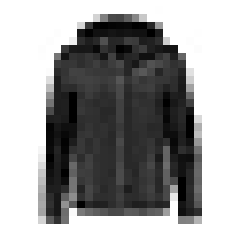

In [10]:
plt.imshow(x_train_1[0], cmap = 'binary')
plt.axis('off')
plt.show()

In [11]:
y_train_1

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

- The labels are in the form of integers. The corresponding class names are

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train_1[0]]

'Coat'

- Visualizing some samples from the dataset

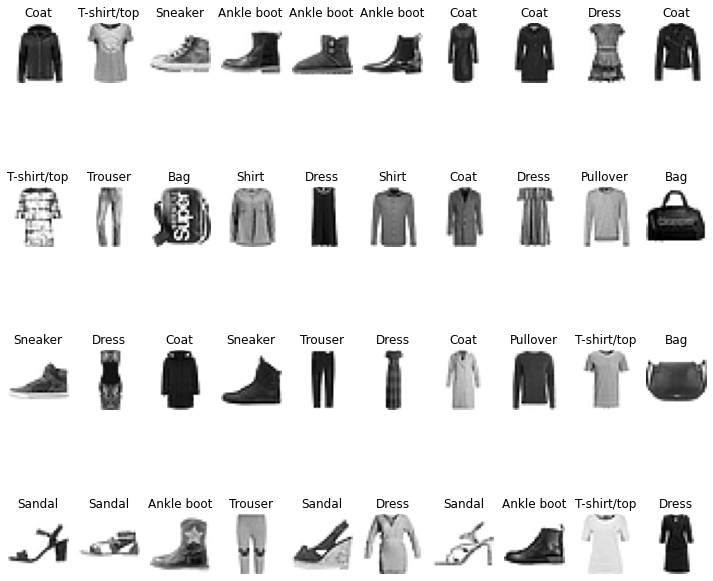

In [30]:
plt.figure(figsize = (10, 10))
for row in range(4):
    for col in range(10):
        index = 10 * row + col
        plt.subplot(4, 10, index + 1)
        plt.imshow(x_train_1[index], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train_1[index]])
plt.tight_layout()
plt.show()

## Building the model

- We will be using a Flatten layer as the input layer. It converts the 2D array into 1D by applying .reshap(-1,1) to each of the input.
- Then a hidden Dense layer having 300 neurons with ReLU activation function.
- Then a hidden Dense layer having 100 neurons with ReLU activation function.
- Then the output Dense layer having 10 neurons, one for each class and softmax activation function since the outputs are mutually exclusive. 

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.layers

In [58]:
hidden1 = model.layers[1]

In [59]:
hidden1.name

'dense_1'

In [62]:
model.get_layer('dense_1')

In [63]:
weights, biases = hidden1.get_weights()

In [64]:
weights

array([[ 0.01333732,  0.04725046, -0.0570311 , ..., -0.04804432,
         0.02248828,  0.05594432],
       [ 0.02650639, -0.0738351 , -0.04396531, ..., -0.0463449 ,
         0.0069727 , -0.05789653],
       [ 0.01056117, -0.05477575,  0.06487535, ..., -0.01196058,
         0.05151877,  0.05475868],
       ...,
       [-0.06440203,  0.05353636,  0.03964897, ..., -0.00538354,
         0.02674207, -0.01154476],
       [ 0.01279742,  0.05001193,  0.01665989, ..., -0.00154016,
         0.00199982,  0.01123977],
       [ 0.02231175,  0.03259391, -0.06579236, ...,  0.03093875,
         0.02849336,  0.01414615]], dtype=float32)

In [65]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [66]:
weights.shape

(784, 300)

In [67]:
biases.shape

(300,)

## Compiling the model

In [70]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

- The loss function used is the sparse categorical crossentropy since the output is sparse labels.
- We will be training the model using Stochastic Gradient Descent i.e, Keras will perform reverse-mode autodiff gradient descent.
- Since it is a clasification task, we will be measuring accuracy during training and evaluation.

## Training and evaluating the model

In [71]:
history = model.fit(x_train_1, y_train_1, epochs = 30, validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7187 - accuracy: 0.7622 - val_loss: 0.5038 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4872 - accuracy: 0.8310 - val_loss: 0.4435 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4416 - accuracy: 0.8454 - val_loss: 0.4181 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4139 - accuracy: 0.8547 - val_loss: 0.3956 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3953 - accuracy: 0.8611 - val_loss: 0.4046 - val_accuracy: 0.8608
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3791 - accuracy: 0.8665 - val_loss: 0.3753 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3656 - accuracy: 0.8715 - val_loss: 0.3642 - val_accuracy:

- We can see that at the end of the 30th epoch, the training accuracy is at 91.72 and the validation accuracy is at 88.9.
- Since the accuracy is still increasing, we can continue training the model for further epochs.

In [84]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [85]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [88]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [89]:
df = pd.DataFrame(history.history)

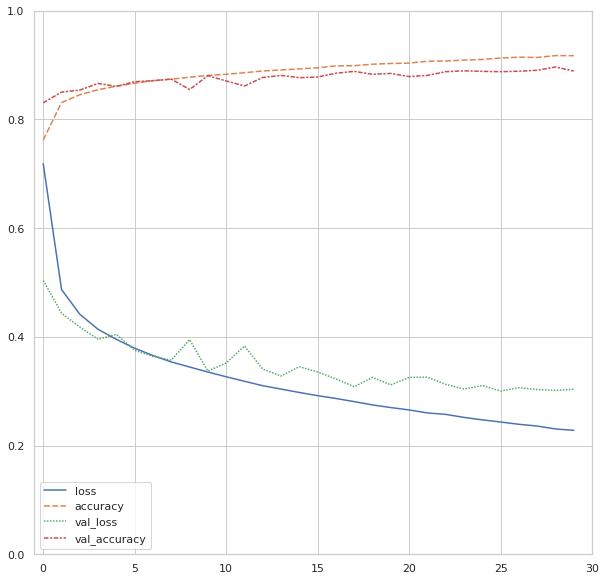

In [106]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df)
plt.axis([-0.5,30, 0, 1])
plt.show()

- From the loss curves, it is evident that the training and validation accuracy and loss is almost identical. This eliminates the doubts of the model overfitting the training data.

In [107]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8785


[0.3334614038467407, 0.8784999847412109]

- Upon evaluation with the test set we get a lower accuracy than the validation set.
- Usually this happens after the hyperparameters are tuned on the validation set accuracy. This is not the case here as we did not tune the parameters.

## Predictions using the model

- Since we dont have any new data for predictions, we will be using the first three instances of the test set.

In [111]:
x_new = x_test[:3]
y_prob = model.predict(x_new)

In [112]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.11, 0.  , 0.88],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [113]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [115]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

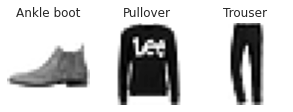

In [121]:
sns.set(style = 'white')
plt.figure(figsize = (5,5))
for index, image in enumerate(x_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.show()